In [1]:
import re
import string
import nltk
import nltk.corpus
import numpy as np
import pandas as pd
import seaborn as sns
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
elon = pd.read_csv("Elon_musk.csv",encoding='unicode_escape')

In [3]:
elon

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [5]:
elon.isna().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [6]:
elon.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
elon

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [8]:
elon.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [9]:
elon.Text=elon.Text.apply(lambda x: re.sub('[^a-zA-Z ]',"",x))

In [10]:
elon

,Text
0,kunalb Im an alien
1,IDAACarmack Ray tracing on Cyberpunk with HDR ...
2,joerogan Spotify Great interview
3,gtera Doge is underestimated
4,teslacn Congratulations Tesla China for amazin...
...,...
1994,flcnhvy True it sounds so surreal but the nega...
1995,PPathole Make sure to read ur terms amp condit...
1996,TeslaGong PPathole Samwise Gamgee
1997,PPathole Altho Dumb and Dumber is UFUF


In [11]:
elon.Text=elon.Text.apply(lambda x: x.lower())

In [12]:
elon

,Text
0,kunalb im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,gtera doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1994,flcnhvy true it sounds so surreal but the nega...
1995,ppathole make sure to read ur terms amp condit...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is ufuf


In [13]:
elon.Text=elon.Text.apply(lambda x: x.split())

In [14]:
elon

,Text
0,"[kunalb, im, an, alien]"
1,"[idaacarmack, ray, tracing, on, cyberpunk, wit..."
2,"[joerogan, spotify, great, interview]"
3,"[gtera, doge, is, underestimated]"
4,"[teslacn, congratulations, tesla, china, for, ..."
...,...
1994,"[flcnhvy, true, it, sounds, so, surreal, but, ..."
1995,"[ppathole, make, sure, to, read, ur, terms, am..."
1996,"[teslagong, ppathole, samwise, gamgee]"
1997,"[ppathole, altho, dumb, and, dumber, is, ufuf]"


In [15]:
elon.Text=elon.Text.apply(lambda x:" ".join(x))

In [16]:
elon

,Text
0,kunalb im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,gtera doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1994,flcnhvy true it sounds so surreal but the nega...
1995,ppathole make sure to read ur terms amp condit...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is ufuf


In [17]:
elon_musk =[x.strip() for x in elon.Text]
elon_musk=[x for x in elon_musk if x]
elon_musk[0:10]

['kunalb im an alien',
 'idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it',
 'joerogan spotify great interview',
 'gtera doge is underestimated',
 'teslacn congratulations tesla china for amazing execution last year now on to the next for even more',
 'happy new year of the ox httpstcowfkmyuoj',
 'frodo was the underdogeall thought he would failhimself most of all httpstcozgxjfdzzrm',
 'owensparks flcnhvy anonyx haha thanks',
 'flcnhvy anonyx indeed tweets definitely do not represent realworld time allocation',
 'the most entertaining outcome is the most likely']

In [18]:
afi_n = pd.read_csv("negative-words.txt",error_bad_lines=False,sep=';', encoding='latin-1')
afi_n =afi_n.drop(afi_n.index[0:26],axis=0)

In [19]:
afi_n=afi_n.iloc[:,0]
afi_n.dropna(inplace=True)
afi_n=afi_n.reset_index()
afi_n['value']=-1
afi_n.drop(['index'],axis=1,inplace=True)
afi_n.columns=['words','value']
afi_n

,words,value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


In [20]:
afi_p = pd.read_csv("positive-words.txt",sep=';', encoding='latin-1')

In [21]:
afi_p.shape

(2039, 77)

In [22]:
afi_p=afi_p.iloc[:,0]
afi_p.dropna(inplace=True)
afi_p=afi_p.reset_index()
afi_p['value']=1
afi_p.drop(['index'],axis=1,inplace=True)
afi_p.columns=['words','value']
afi_p

,words,value
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


In [23]:
afi_p

,words,value
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


In [24]:
afi_n

,words,value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


In [25]:
afi=pd.concat([afi_n,afi_p],ignore_index=True)

In [26]:
afi

,words,value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
6784,youthful,1
6785,zeal,1
6786,zenith,1
6787,zest,1


In [27]:
affinity_scores=afi.set_index('words')['value'].to_dict()

In [28]:
affinity_scores

{'2-faced': -1,
 '2-faces': -1,
 'abnormal': -1,
 'abolish': -1,
 'abominable': -1,
 'abominably': -1,
 'abominate': -1,
 'abomination': -1,
 'abort': -1,
 'aborted': -1,
 'aborts': -1,
 'abrade': -1,
 'abrasive': -1,
 'abrupt': -1,
 'abruptly': -1,
 'abscond': -1,
 'absence': -1,
 'absent-minded': -1,
 'absentee': -1,
 'absurd': -1,
 'absurdity': -1,
 'absurdly': -1,
 'absurdness': -1,
 'abuse': -1,
 'abused': -1,
 'abuses': -1,
 'abusive': -1,
 'abysmal': -1,
 'abysmally': -1,
 'abyss': -1,
 'accidental': -1,
 'accost': -1,
 'accursed': -1,
 'accusation': -1,
 'accusations': -1,
 'accuse': -1,
 'accuses': -1,
 'accusing': -1,
 'accusingly': -1,
 'acerbate': -1,
 'acerbic': -1,
 'acerbically': -1,
 'ache': -1,
 'ached': -1,
 'aches': -1,
 'achey': -1,
 'aching': -1,
 'acrid': -1,
 'acridly': -1,
 'acridness': -1,
 'acrimonious': -1,
 'acrimoniously': -1,
 'acrimony': -1,
 'adamant': -1,
 'adamantly': -1,
 'addict': -1,
 'addicted': -1,
 'addicting': -1,
 'addicts': -1,
 'admonish': -1

In [29]:
from textblob import TextBlob
elon['polarity']=elon['Text'].apply(lambda x: TextBlob(x).sentiment[0])
elon

,Text,polarity
0,kunalb im an alien,-0.250000
1,idaacarmack ray tracing on cyberpunk with hdr ...,0.000000
2,joerogan spotify great interview,0.800000
3,gtera doge is underestimated,0.000000
4,teslacn congratulations tesla china for amazin...,0.275000
...,...,...
1994,flcnhvy true it sounds so surreal but the nega...,0.111111
1995,ppathole make sure to read ur terms amp condit...,0.500000
1996,teslagong ppathole samwise gamgee,0.000000
1997,ppathole altho dumb and dumber is ufuf,-0.375000


In [30]:
elon["sentiment"]=''
elon.loc[elon["polarity"]>0,"sentiment"]="positive"
elon.loc[elon["polarity"]==0,"sentiment"]="neutral"
elon.loc[elon["polarity"]<0,"sentiment"]="negative"

In [31]:
elon

,Text,polarity,sentiment
0,kunalb im an alien,-0.250000,negative
1,idaacarmack ray tracing on cyberpunk with hdr ...,0.000000,neutral
2,joerogan spotify great interview,0.800000,positive
3,gtera doge is underestimated,0.000000,neutral
4,teslacn congratulations tesla china for amazin...,0.275000,positive
...,...,...,...
1994,flcnhvy true it sounds so surreal but the nega...,0.111111,positive
1995,ppathole make sure to read ur terms amp condit...,0.500000,positive
1996,teslagong ppathole samwise gamgee,0.000000,neutral
1997,ppathole altho dumb and dumber is ufuf,-0.375000,negative


# Problem statement-2

In [59]:
import requests
from bs4 import BeautifulSoup

In [99]:
link='https://www.amazon.in/Apple-iPad-MQDY2HN-Tablet-Wi-Fi/product-reviews/B072N32KFK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [115]:
review_list=[]

for k in range(0,6):
    review_link=link+'&pageNumber='+str(k)
    print(review_link)
    page=requests.get(review_link)
    soup=BeautifulSoup(page.content,'html.parser')
    reviews=soup.find_all('span',class_='review-text-content')
    
    for i in range(0,len(reviews)):
        
        review_list.append(reviews[i].get_text().strip())

https://www.amazon.in/Apple-iPad-MQDY2HN-Tablet-Wi-Fi/product-reviews/B072N32KFK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.in/Apple-iPad-MQDY2HN-Tablet-Wi-Fi/product-reviews/B072N32KFK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Apple-iPad-MQDY2HN-Tablet-Wi-Fi/product-reviews/B072N32KFK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Apple-iPad-MQDY2HN-Tablet-Wi-Fi/product-reviews/B072N32KFK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Apple-iPad-MQDY2HN-Tablet-Wi-Fi/product-reviews/B072N32KFK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Apple-iPad-MQDY2HN-Tablet-Wi-Fi/product-reviews/B072N32KFK/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5


In [116]:
review_list

["Yes it is heavy investment but the return is very high. If you are study freak and have to take lots of notes in class or in genral then this is the tab for you.  you can take notes like taking on real copy. But the drawback is that with the Wifi On, it can last upto 2 to 2.5 hours when you are continuosly writng  on the tablet. So if you have lots of class in a day and back to back then you have to have the good battery backup, otherwise it will leave you in midway and you have to take down the notes on the classic pen and paper.There were times when I had only this tab for noting down anything and  if need to sign the attendance in class, then I have to ask for the real ink pen form some friends.Apple is good in making the things but it presents some times limitation like you don't have files folder where you can arrange things in a single folder. You can not download the pdf or videos in chrome or safari browser.They can make the ios user friendly but rather it is more complicated

In [67]:
len(review_list)

10

In [68]:
df=pd.DataFrame({'Reviews':review_list})
pd.set_option('max_colwidth', 800)
df

,Reviews
0,"INITIAL IMPRESSIONS- Light weight and beautiful display. Easy to hold, easy to read. Thank you Vani !WHY SHOULD ONE BUY KINDLE?I was using Kindle app on smartphone and PC for quite few years, and was skeptical of investing 5859 on this mere kindle reader (books need to be purchased separately). However, this lockdown forced me to spend all my time on phone and PC, leaving strained eyes. Also, distractions(whatspp, youtube etc) is so high while reading on internet connected devices.This reader solves the problem in one go. It is light to hold for hours, and distraction free to improve your productivity to 2x-3x. Best of all, no strains on eyes means, you can carry your work for more amount of time, effectively making you productive by 4x-5x.I am a law student and all my books, articles ..."
1,"Lightweight, smooth, paper like feel. Doesn't respond fast though, it takes a little bit time to respond compared to mobile. You can read your own documents, ebooks too, you have to send it to your kindle mail which will be provided to you and it will appear in the kindle device. Packaging is nice. Haven't found night mode yet."
2,"I've gone through several kindles in the last few years (I have somewhat of a Kindle buying problem and I read about four books a month) and I've used everything from the Paperwhite 10th Gen, to the Paperwhite 11th Gen to the Kindle Oasis to even the new basic Kindle.I wanted an inexpensive, compact basic model that I could throw in my bag and not have to worry about, but wasn't willing to spend 10k on the new basic Kindle. It didn't seem worth it to pay 4k more just for a 300ppi resolution screen and no noticeable upgrades otherwise. It doesn't make a difference to me if my page takes an extra millisecond to load. I probably take longer to turn the page of a physical book anyway.So this one does the job for me despite having a lower resolution screen (you can barely notice it, actuall..."
3,"If you'd like to read, get distracted from your mobile, then kindle is the best investment. I regret buying it very late. I finished a book (500page approx) in just 2 days after buying. It makes you read more! Thanks Amazon Kindle. My world has changed for good!"
4,"I'm sharing my thoughts after using this Kindle for a week. Although I wasn't a consistent reader before, this purchase has changed that. The Kindle has truly enhanced my reading experience, offering a level of enjoyment that traditional books can't match. The convenience it brings to reading is remarkable. Features like Word Wise and the built-in dictionary have proven invaluable. However, I do find the price point a tad high, especially given the absence of USB C charging, warm light, and audiobook support. I got it for 6700 INR. One feature I believe would be extremely beneficial is Audio Pronunciation for the dictionary and vocabulary builder. Since the device already boasts a text-to-speech engine, I believe integrating this function in upcoming software updates would be a seamles..."
5,It is a great device for those who like to read books 📚 I suggest it is worth buying go for it
6,Bought one for 6800. But it's backlight was problematic. Backlight colour was pale orange. So the background colour was also pale orange. So I returned. Ordered another one for 8000. It was alright. But my mind keeps telling me that if you are ready to spend 8000 then you should return it and buy the 300 ppi 2022 model basic kindle in the coming great indian festival sale. So today I returned it. Wouldn't have returned the second one if bought for 6800.Now about the kindle experience. Well I own Ipad 9th gen. Kindle is reading from book while ipad reading is from screen. Never Ipad will compare to reading experience in kindle.I miss my kindle. Hoping to buy 2022 model basic version in offer coming festival sale.
7,Nice product. Very handy and sleek.
8,"The device does not support ePub which is really disappointing.The device does not support seek to a specific page o

In [104]:
reviews=[x.strip() for x in review_list]

In [105]:
reviews

[]

In [106]:
df['cleaned_reviews']=[x.lower()for x in df.Reviews]

In [107]:
df.head()

,Reviews,cleaned_reviews
0,"INITIAL IMPRESSIONS- Light weight and beautiful display. Easy to hold, easy to read. Thank you Vani !WHY SHOULD ONE BUY KINDLE?I was using Kindle app on smartphone and PC for quite few years, and was skeptical of investing 5859 on this mere kindle reader (books need to be purchased separately). However, this lockdown forced me to spend all my time on phone and PC, leaving strained eyes. Also, distractions(whatspp, youtube etc) is so high while reading on internet connected devices.This reader solves the problem in one go. It is light to hold for hours, and distraction free to improve your productivity to 2x-3x. Best of all, no strains on eyes means, you can carry your work for more amount of time, effectively making you productive by 4x-5x.I am a law student and all my books, articles ...","initial impressions- light weight and beautiful display. easy to hold, easy to read. thank you vani !why should one buy kindle?i was using kindle app on smartphone and pc for quite few years, and was skeptical of investing 5859 on this mere kindle reader (books need to be purchased separately). however, this lockdown forced me to spend all my time on phone and pc, leaving strained eyes. also, distractions(whatspp, youtube etc) is so high while reading on internet connected devices.this reader solves the problem in one go. it is light to hold for hours, and distraction free to improve your productivity to 2x-3x. best of all, no strains on eyes means, you can carry your work for more amount of time, effectively making you productive by 4x-5x.i am a law student and all my books, articles ..."
1,"Lightweight, smooth, paper like feel. Doesn't respond fast though, it takes a little bit time to respond compared to mobile. You can read your own documents, ebooks too, you have to send it to your kindle mail which will be provided to you and it will appear in the kindle device. Packaging is nice. Haven't found night mode yet.","lightweight, smooth, paper like feel. doesn't respond fast though, it takes a little bit time to respond compared to mobile. you can read your own documents, ebooks too, you have to send it to your kindle mail which will be provided to you and it will appear in the kindle device. packaging is nice. haven't found night mode yet."
2,"I've gone through several kindles in the last few years (I have somewhat of a Kindle buying problem and I read about four books a month) and I've used everything from the Paperwhite 10th Gen, to the Paperwhite 11th Gen to the Kindle Oasis to even the new basic Kindle.I wanted an inexpensive, compact basic model that I could throw in my bag and not have to worry about, but wasn't willing to spend 10k on the new basic Kindle. It didn't seem worth it to pay 4k more just for a 300ppi resolution screen and no noticeable upgrades otherwise. It doesn't make a difference to me if my page takes an extra millisecond to load. I probably take longer to turn the page of a physical book anyway.So this one does the job for me despite having a lower resolution screen (you can barely notice it, actuall...","i've gone through several kindles in the last few years (i have somewhat of a kindle buying problem and i read about four books a month) and i've used everything from the paperwhite 10th gen, to the paperwhite 11th gen to the kindle oasis to even the new basic kindle.i wanted an inexpensive, compact basic model that i could throw in my bag and not have to worry about, but wasn't willing to spend 10k on the new basic kindle. it didn't seem worth it to pay 4k more just for a 300ppi resolution screen and no noticeable upgrades otherwise. it doesn't make a difference to me if my page takes an extra millisecond to load. i probably take longer to turn the page of a physical book anyway.so this one does the job for me despite having a lower resolution screen (you can barely notice it, actuall..."
3,"If you'd like to read, get distracted from your mobile, then kindle is the best investment. I 

In [108]:
df['cleaned_reviews']=[re.sub('[^A-Za-z ]+', '',x)for x in df['cleaned_reviews']]
df.head()

,Reviews,cleaned_reviews
0,"INITIAL IMPRESSIONS- Light weight and beautiful display. Easy to hold, easy to read. Thank you Vani !WHY SHOULD ONE BUY KINDLE?I was using Kindle app on smartphone and PC for quite few years, and was skeptical of investing 5859 on this mere kindle reader (books need to be purchased separately). However, this lockdown forced me to spend all my time on phone and PC, leaving strained eyes. Also, distractions(whatspp, youtube etc) is so high while reading on internet connected devices.This reader solves the problem in one go. It is light to hold for hours, and distraction free to improve your productivity to 2x-3x. Best of all, no strains on eyes means, you can carry your work for more amount of time, effectively making you productive by 4x-5x.I am a law student and all my books, articles ...",initial impressions light weight and beautiful display easy to hold easy to read thank you vani why should one buy kindlei was using kindle app on smartphone and pc for quite few years and was skeptical of investing on this mere kindle reader books need to be purchased separately however this lockdown forced me to spend all my time on phone and pc leaving strained eyes also distractionswhatspp youtube etc is so high while reading on internet connected devicesthis reader solves the problem in one go it is light to hold for hours and distraction free to improve your productivity to xx best of all no strains on eyes means you can carry your work for more amount of time effectively making you productive by xxi am a law student and all my books articles and court judgments are in pdf legal...
1,"Lightweight, smooth, paper like feel. Doesn't respond fast though, it takes a little bit time to respond compared to mobile. You can read your own documents, ebooks too, you have to send it to your kindle mail which will be provided to you and it will appear in the kindle device. Packaging is nice. Haven't found night mode yet.",lightweight smooth paper like feel doesnt respond fast though it takes a little bit time to respond compared to mobile you can read your own documents ebooks too you have to send it to your kindle mail which will be provided to you and it will appear in the kindle device packaging is nice havent found night mode yet
2,"I've gone through several kindles in the last few years (I have somewhat of a Kindle buying problem and I read about four books a month) and I've used everything from the Paperwhite 10th Gen, to the Paperwhite 11th Gen to the Kindle Oasis to even the new basic Kindle.I wanted an inexpensive, compact basic model that I could throw in my bag and not have to worry about, but wasn't willing to spend 10k on the new basic Kindle. It didn't seem worth it to pay 4k more just for a 300ppi resolution screen and no noticeable upgrades otherwise. It doesn't make a difference to me if my page takes an extra millisecond to load. I probably take longer to turn the page of a physical book anyway.So this one does the job for me despite having a lower resolution screen (you can barely notice it, actuall...",ive gone through several kindles in the last few years i have somewhat of a kindle buying problem and i read about four books a month and ive used everything from the paperwhite th gen to the paperwhite th gen to the kindle oasis to even the new basic kindlei wanted an inexpensive compact basic model that i could throw in my bag and not have to worry about but wasnt willing to spend k on the new basic kindle it didnt seem worth it to pay k more just for a ppi resolution screen and no noticeable upgrades otherwise it doesnt make a difference to me if my page takes an extra millisecond to load i probably take longer to turn the page of a physical book anywayso this one does the job for me despite having a lower resolution screen you can barely notice it actually and no dark mode which i ...
3,"If you'd like to read, get distracted from your mobile, then kindle is the best investment. I regret buying it ve

In [109]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

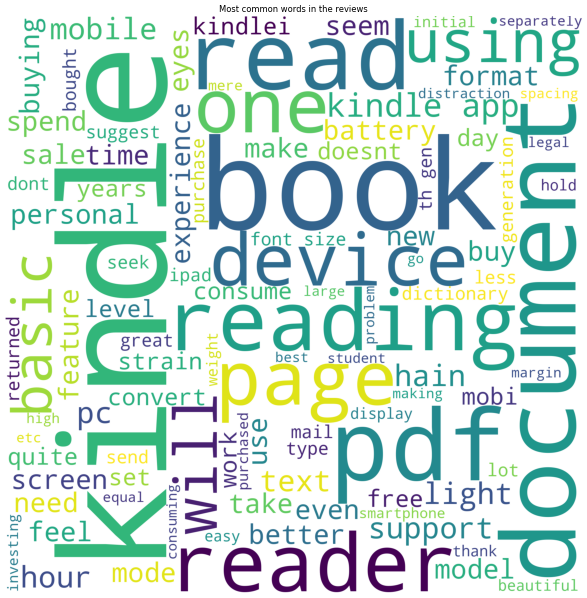

In [110]:
wordcloud = WordCloud(height=2000, width=2000,max_words=100, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['cleaned_reviews'].tolist()))
plt.figure(figsize=(15,15),dpi=50)
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

In [111]:
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10060] A connection attempt failed because the
[nltk_data]     connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>


False

In [112]:
pip install BeautifulSoup

  Using cached BeautifulSoup-3.2.2.tar.gz (32 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [7 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Saif Siddiqui\AppData\Local\Temp\pip-install-wv2cgb37\beautifulsoup_4be6b243b0b043c780fe959558997635\setup.py", line 3
      "You're trying to run a very old release of Beautiful Soup under Python 3. This will not work."<>"Please use Beautiful Soup 4, available through the pip package 'beautifulsoup4'."
                                                                                                     ^
  SyntaxError: invalid syntax
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned abov

In [113]:
a=pd.Series([24.23,25.53,25.41,24.14,29.62,28.25,25.81,24.39,40.26,32.95,91.36,25.99,39.42,26.71,35.00])

([<matplotlib.patches.Wedge at 0x236297ed100>,
 [Text(1.087229608003385, 0.16712803319852174, ''),
  Text(0.9828289461480074, 0.4940113992749534, ''),
  Text(0.7770213716923852, 0.7786127329637529, ''),
  Text(0.500589114389161, 0.9794950426393569, ''),
  Text(0.14701343081593748, 1.09013166689154, ''),
  Text(-0.25102787165672724, 1.0709738594622624, ''),
  Text(-0.5940932351165659, 0.9257716932315078, ''),
  Text(-0.852379310544051, 0.6953053364935786, ''),
  Text(-1.057980932673138, 0.30112513362400867, ''),
  Text(-1.0815202792052954, -0.20078318073907453, ''),
  Text(-0.6253838571430779, -0.9049281911979793, ''),
  Text(0.14694509767976283, -1.0901408800094992, ''),
  Text(0.57095205164786, -0.9402200565394782, ''),
  Text(0.902381559110251, -0.6290528767740856, ''),
  Text(1.0734100571373322, -0.24039727377079212, '')])

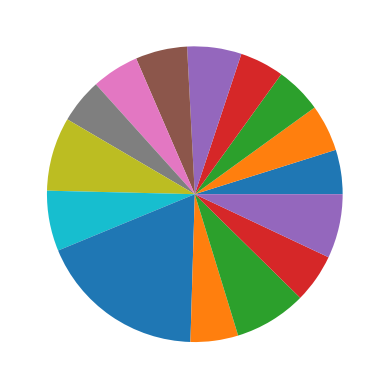

In [114]:
a=pd.Series([24.23,25.53,25.41,24.14,29.62,28.25,25.81,24.39,40.26,32.95,91.36,25.99,39.42,26.71,35.00])
names=['Allied Signal''Bankers Trust''General Mills''ITT Industries''J.P.Morgan & Co.''Lehman Brothers''Marriott''MCI''Merrill Lynch''Microsoft''Morgan Stanley''Sun Microsystems''Travelers''US Airways''Warner-Lambert']
plt.pie(a)